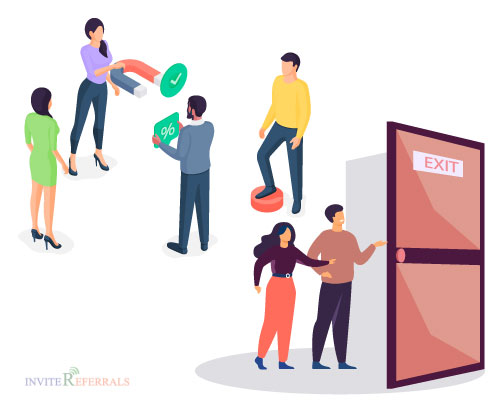

In [73]:
from IPython.display import Image
Image(filename='/Users/samuelkawuma/Downloads/What-is-Customer-Churn-1.jpeg')


In [2]:
!pip install catboost

     |████████████████████████████████| 12.7 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 27.7 MB 4.1 MB/s eta 0:00:011
     |████████████████████████████████| 46 kB 7.1 MB/s  eta 0:00:01
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [4]:
#load necccessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [74]:
# Reading the Dataset
df = pd.read_csv('/Users/samuelkawuma/Desktop/Project data.csv')

In [75]:
#check size of the observation and variable
df.shape

(10000, 14)

In [77]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
#load columns in the datasets
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [80]:
#checking for missing data
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [81]:
# Checking if there are null values or not
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [82]:
#Remove variables that does not have an effect.
df.drop(["RowNumber","CustomerId","Surname"], axis = 1 , inplace = True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [83]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [84]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [85]:
# Including only Potential Predictors as independent varibles
final_dataset = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]


In [86]:
final_dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
#Analyzing target variable


<AxesSubplot:xlabel='Exited', ylabel='count'>

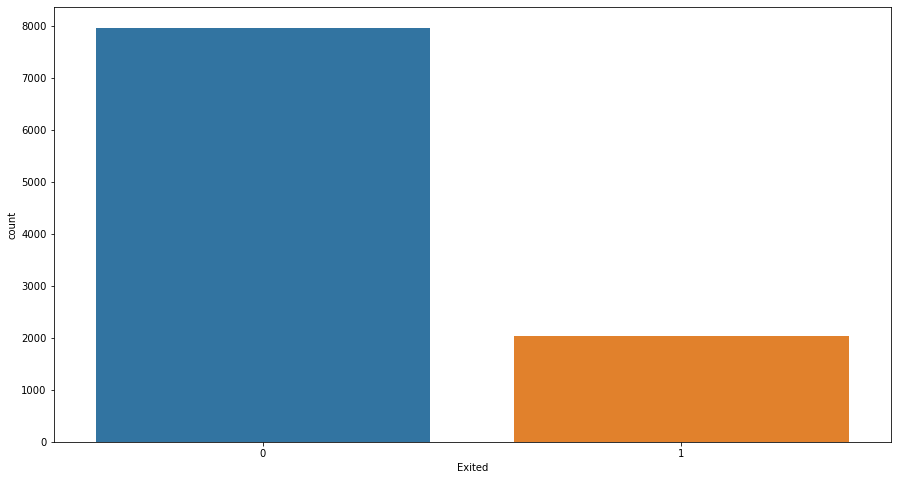

In [87]:
plt.figure(figsize = (15,8))
sns.countplot('Exited', data = df)

In [20]:
## Analyzing how categorical data relates with the target variable (exited)

In [89]:
cat_data = df[['Gender', 'Tenure','Geography', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]

Male      5457
Female    4543
Name: Gender, dtype: int64


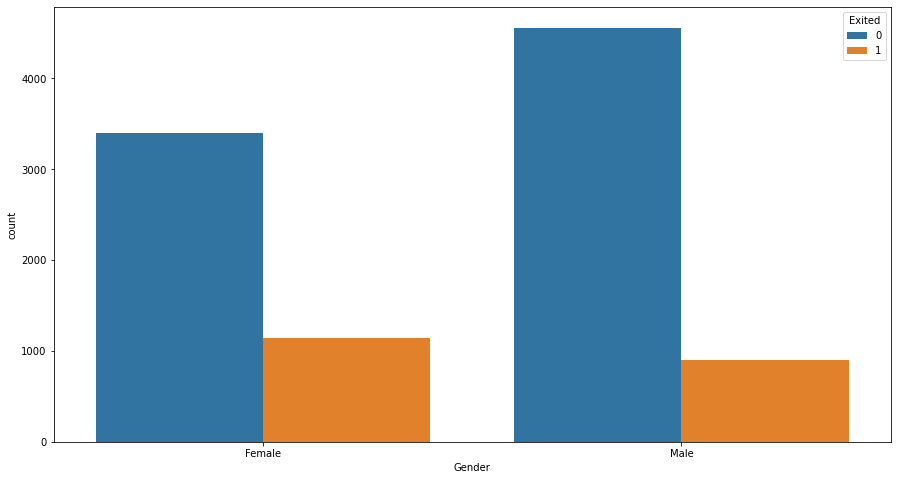

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


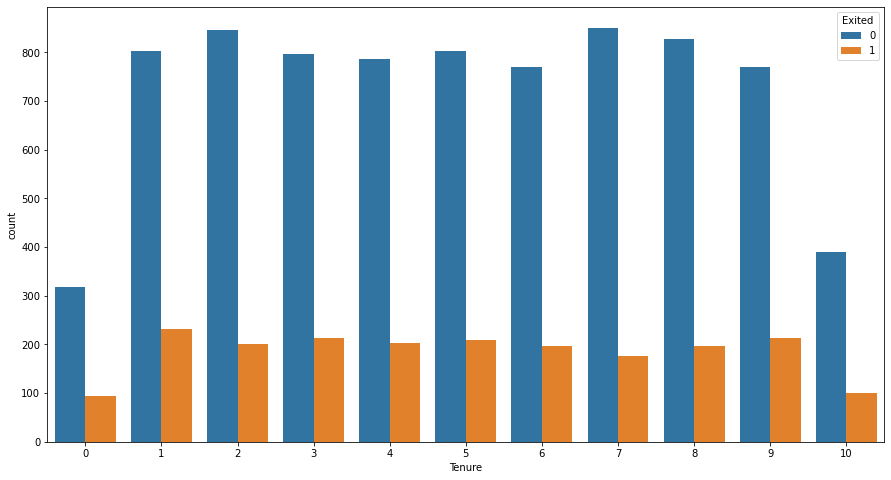

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


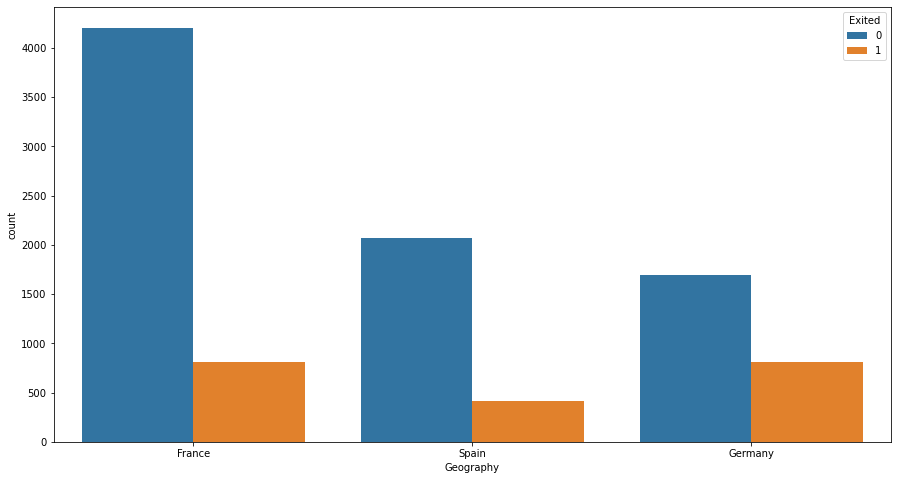

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


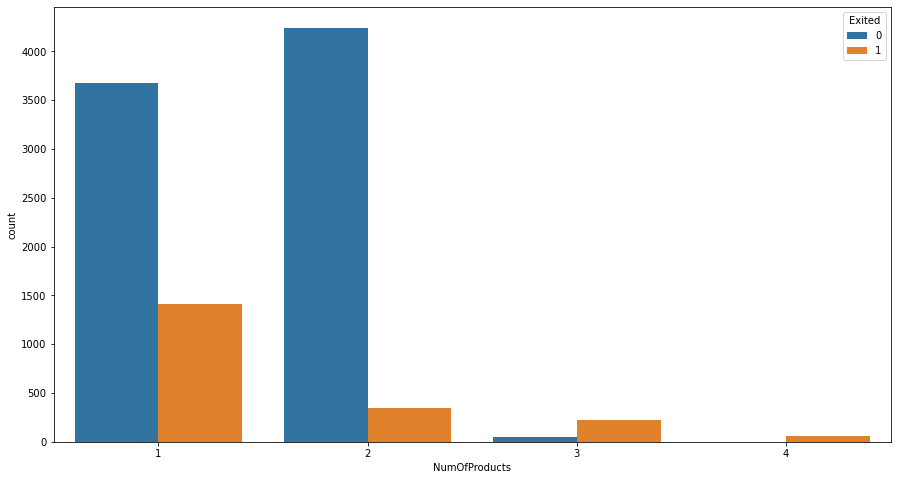

1    7055
0    2945
Name: HasCrCard, dtype: int64


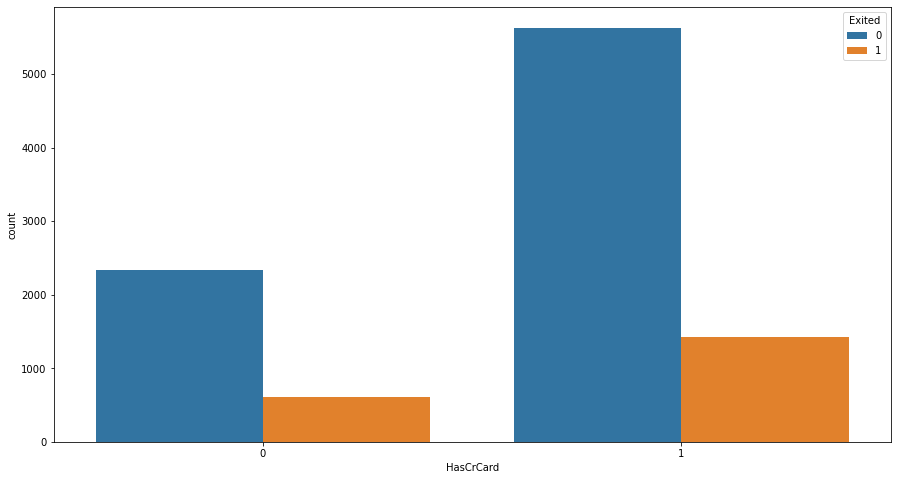

1    5151
0    4849
Name: IsActiveMember, dtype: int64


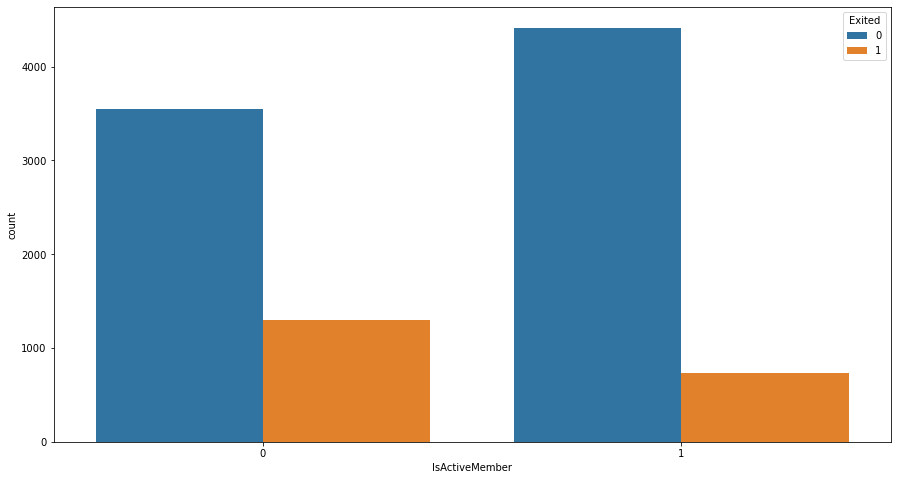

In [90]:
def categorical(var):
    print(df[var].value_counts())
    
    plt.figure(figsize = (15,8))
    sns.countplot(x = var, data = df, hue = 'Exited')
    plt.show()
    
for i in cat_data:
    categorical(i)

In [24]:
#Analyzing numerical data

In [25]:
Num_data = df[[ 'Age', 'CreditScore', 'Balance', 'EstimatedSalary' ]]

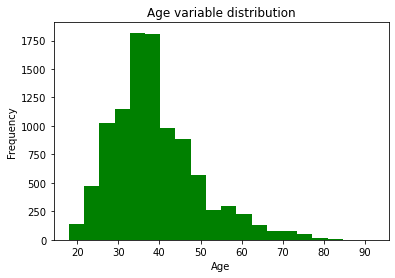

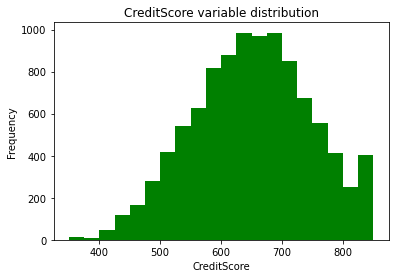

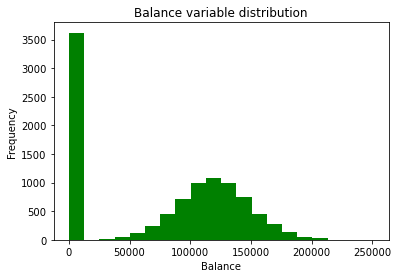

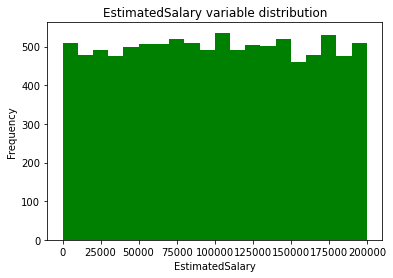

In [27]:
def numerical(var):

    plt.hist(df[var], bins = 20, color = "green")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title("{} variable distribution".format(var))
    plt.show()
    
for i in Num_data:
    numerical(i)

In [91]:
#VISUALISING OUTLIERS AND REMOVAL
import os, sys
import warnings
warnings.filterwarnings('ignore')

In [92]:
list_order = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

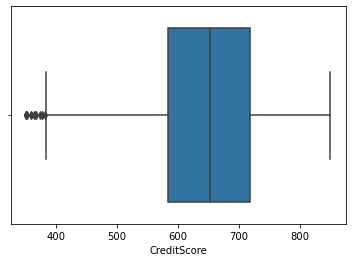

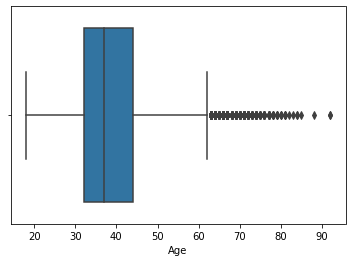

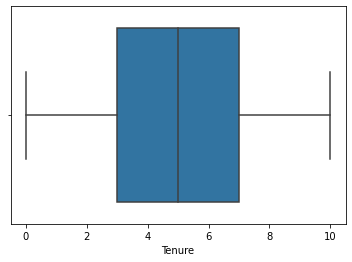

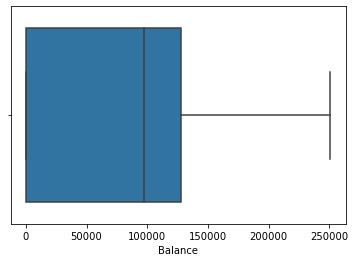

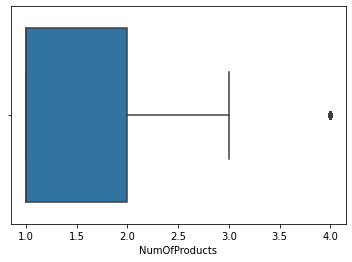

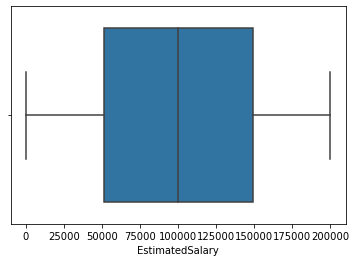

In [93]:
def viz_outliers(var):

    sns.boxplot(df[var])
    plt.show()
    
for i in list_order:
    viz_outliers(i)

In [94]:
# Seems like CreditScore, Age, NumOfProducts have outliers
outliers = ['Age','CreditScore','NumOfProducts']

In [95]:
# create a function to remove the outliers
def outlier_removal(data,column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    point_low = q1 - 1.5 * iqr
    point_high = q3 + 1.5 * iqr
    cleaned_data = data.loc[(data[column] >  point_low) & (data[column] <  point_high)]
    return cleaned_data

In [96]:
# clean the dataset by removing outliers
data_cleaned = outlier_removal(outlier_removal(outlier_removal(df,'Age'),'CreditScore'),'NumOfProducts')

print(df.shape)
print(data_cleaned.shape)

(10000, 11)
(9516, 11)


<AxesSubplot:>

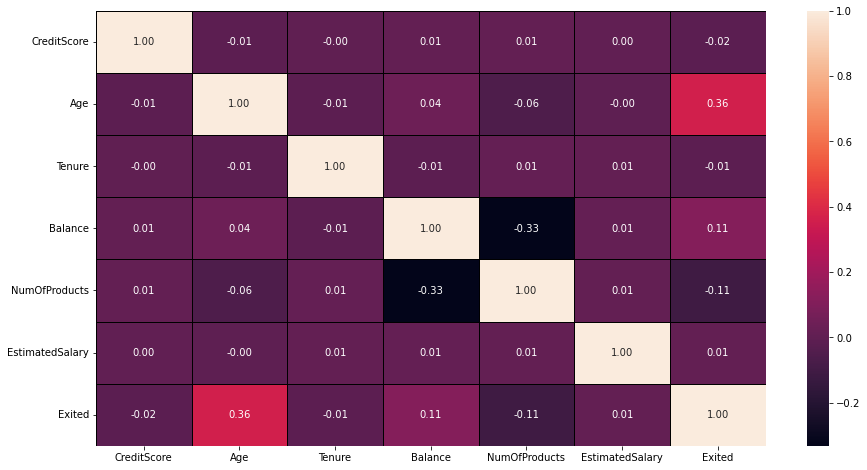

In [97]:
plt.figure(figsize = (15,8))
list_corr = ['CreditScore' ,'Age' ,'Tenure' ,'Balance' ,'NumOfProducts' ,'EstimatedSalary' ,'Exited']
sns.heatmap(data_cleaned[list_corr].corr(), annot = True, linecolor = "black", lw = 0.5, fmt= '.2f') 


In [39]:
#Analyzing how numerical variable relates with the target variable (exited)


<AxesSubplot:xlabel='Age', ylabel='Exited'>

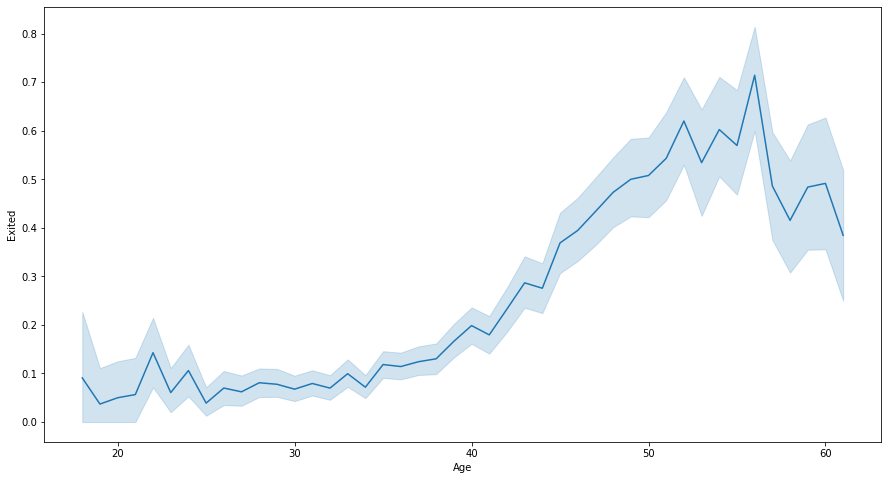

In [98]:
plt.figure(figsize = (15,8))
sns.lineplot(x = "Age", y = "Exited", data = data_cleaned)

In [41]:
data_cleaned.groupby(data_cleaned["Exited"])["Age"].mean()


Exited
0    36.089197
1    43.793583
Name: Age, dtype: float64

In [42]:
#Feature Engineering

In [99]:
# since geography is a categorical data lets one-hot encode it by using pd.get_dummies
data_cleaned = pd.get_dummies(data_cleaned, columns = ['Geography'])

# since gender is a categorical data lets label encode it as female = 1 and male = 0
def func(data_cleaned):
    d =[]
    for m in data_cleaned:
        if m =='Female':
            d.append(1)
        else:
            d.append(0)
    return d

data_cleaned['Gender'] = func(data_cleaned['Gender'])

In [100]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9516 non-null   int64  
 1   Gender             9516 non-null   int64  
 2   Age                9516 non-null   int64  
 3   Tenure             9516 non-null   int64  
 4   Balance            9516 non-null   float64
 5   NumOfProducts      9516 non-null   int64  
 6   HasCrCard          9516 non-null   int64  
 7   IsActiveMember     9516 non-null   int64  
 8   EstimatedSalary    9516 non-null   float64
 9   Exited             9516 non-null   int64  
 10  Geography_France   9516 non-null   uint8  
 11  Geography_Germany  9516 non-null   uint8  
 12  Geography_Spain    9516 non-null   uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 1.1 MB


In [45]:
#Modelling

In [101]:
x = data_cleaned.drop('Exited', axis = 1) 
y = data_cleaned['Exited']

In [102]:
#splitting data into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42
                                                   )

In [103]:
#LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [104]:
Lr = LogisticRegression() # algorithm instantiation
Lr.fit(x_train, y_train) # model learning


LogisticRegression()

In [107]:
#ur predictions on the test data
pred = Lr.predict(x_test)

print(classification_report(y_test, pred, digits=2))

# evaluate the test data using accuracy score
#print("Accuracy score of Logistic Regression model: ", accuracy_score(y_test, pred))
print(pred[0])

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2277
           1       0.50      0.09      0.16       578

    accuracy                           0.80      2855
   macro avg       0.66      0.54      0.52      2855
weighted avg       0.75      0.80      0.74      2855

0


In [53]:
#Perform feature scaling (standardization) using standardscalar()
sc = StandardScaler()
xstandard_train = sc.fit_transform(x_train)
xstandard_test = sc.transform (x_test)

In [54]:
Lr_s = LogisticRegression() # algorithm instantiation
Lr_s.fit(xstandard_train, y_train)

pred = Lr_s.predict(xstandard_test)

print(classification_report(y_test, pred, digits=2))
Lr_score = accuracy_score(y_test, pred)
print("Accuracy score of Standardised Logistic Regression model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2277
           1       0.70      0.27      0.39       578

    accuracy                           0.83      2855
   macro avg       0.77      0.62      0.64      2855
weighted avg       0.81      0.83      0.80      2855

Accuracy score of Standardised Logistic Regression model:  0.8287215411558669


In [55]:
#RandomForestClassifier

In [56]:
rand = RandomForestClassifier(random_state = 42)

rand.fit(x_train, y_train)
pred = rand.predict(x_test)

print(classification_report(y_test, pred, digits=2))
rand_score = accuracy_score(y_test, pred)
print("Accuracy score of Random Forest model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2277
           1       0.77      0.45      0.57       578

    accuracy                           0.86      2855
   macro avg       0.82      0.71      0.74      2855
weighted avg       0.85      0.86      0.85      2855

Accuracy score of Random Forest model:  0.8619964973730297


In [57]:
rand = RandomForestClassifier(random_state = 42, max_depth = 10, n_estimators = 1000)

rand.fit(x, y)

scoreRand = cross_val_score(rand, x, y, cv=5, scoring='accuracy')
print ('The mean value of cross val score is {}'.format(scoreRand.mean()))

The mean value of cross val score is 0.8645439310774231


In [63]:
#XGBClassifier
import os, sys
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

In [66]:
xgb =XGBClassifier(learning_rate=0.01,n_estimators=200, 
                            max_depth=5, eval_metric="logloss")

xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)

print(classification_report(y_test, pred, digits=2))
xgb_score = accuracy_score(y_test, pred)
print("Accuracy score of XGB model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2277
           1       0.80      0.42      0.55       578

    accuracy                           0.86      2855
   macro avg       0.84      0.70      0.73      2855
weighted avg       0.86      0.86      0.84      2855

Accuracy score of XGB model:  0.861646234676007


In [67]:
xgb =XGBClassifier()
xgb.fit(x, y)

scoreXGB = cross_val_score(xgb, x, y, cv=10, scoring='accuracy')
print ('The mean value of cross val score is {}'.format(scoreXGB.mean()))

[00:34:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:34:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:34:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:34:59] WARNING: /Users/runner/miniforge3/cond

In [70]:
model_data =[['Random Forest Classifier', rand_score],
             ['XGB Classifier', xgb_score],
             ['Logistic Regression', Lr_score]]
              

indexes = [1,2,3]
columns_name = ['MODEL', 'ACCURACY_SCORE']
ife = pd.DataFrame(data = model_data,index = indexes, columns = columns_name )
print(ife)

                      MODEL  ACCURACY_SCORE
1  Random Forest Classifier        0.861996
2            XGB Classifier        0.861646
3       Logistic Regression        0.828722


In [71]:
# saving the model 
import pickle 
pickle_out = open("churnmodel.pkl", mode = "wb") 
pickle.dump(rand, pickle_out) 
pickle_out.close()